In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import site
import numpy as np
import pandas as pd

In [2]:
site.addsitedir('/mnt/home/agabrielpillai/github/') 
import illustris_sam as ilsam

In [3]:
basePath = '/mnt/ceph/users/agabrielpillai/camels_sam/hdf5/CV/CV_0/'

In [4]:
def genFullSubvolumes(n):
    subvolume_list = []

    for i in range(n):
        for j in range(n):
            for k in range(n):
                subvolume_list.append([i, j, k])

    return subvolume_list

In [9]:
galprop_fields = ['GalpropHaloIndex_Snapshot', 'GalpropMvir', 'GalpropRhalo', 
                  'GalpropMstar', 'GalpropSatType', 'GalpropPos',
'GalpropRfric']

In [10]:
SAM_subhalos_99 = ilsam.groupcat.load_snapshot_subhalos(basePath, 99, genFullSubvolumes(2), 
                                                        fields=galprop_fields)
# SAM_halos_99 = ilsam.groupcat.load_snapshot_halos(basePath, 99, genFullSubvolumes(2), 
#                                                   fields=['HalopropIndex_Snapshot', 'HalopropMvir'])

In [12]:
import pandas as pd 

In [35]:
df = pd.DataFrame()

for key in list(SAM_subhalos_99.keys())[:-1]:
    if len(SAM_subhalos_99[key].shape) == 1: 
        df[key] = SAM_subhalos_99[key]

In [69]:
df_sats = df[df['GalpropSatType'] != 0].reset_index(drop=True)
df_cens = df[df['GalpropSatType'] == 0].reset_index(drop=True)

In [70]:
df_sats['GalpropRfric'] / df_sats['GalpropRhalo']

0         4.154116
1         4.926264
2         4.125754
3         5.556596
4        12.769183
           ...    
39746     1.734615
39747     1.504271
39748     0.916796
39749     1.190999
39750     0.855941
Length: 39751, dtype: float32

In [46]:
df_sats['GalpropRfric']

19        0.195619
20        0.262428
21        0.282464
22        0.696236
23        0.664968
            ...   
164392    0.126297
164407    0.117998
164441    0.086651
164475    0.104475
164482    0.082514
Name: GalpropRfric, Length: 39751, dtype: float32

In [47]:
df_sats['GalpropRhalo']

19        0.047090
20        0.053271
21        0.068464
22        0.125299
23        0.052076
            ...   
164392    0.072810
164407    0.078442
164441    0.094516
164475    0.087720
164482    0.096402
Name: GalpropRhalo, Length: 39751, dtype: float32

In [48]:
df_sats

,GalpropHaloIndex_Snapshot,GalpropMvir,GalpropRhalo,GalpropMstar,GalpropSatType,GalpropRfric,GalpropSnapNum
19,18,43.450401,0.047090,0.191630,1.0,0.195619,99.0
20,18,38.529598,0.053271,0.105563,1.0,0.262428,99.0
21,18,72.213699,0.068464,0.224593,1.0,0.282464,99.0
22,18,493.316986,0.125299,26.097799,2.0,0.696236,99.0
23,18,32.201500,0.052076,0.107515,2.0,0.664968,99.0
...,...,...,...,...,...,...,...
164392,124645,33.289001,0.072810,0.035662,1.0,0.126297,99.0
164407,124659,32.196602,0.078442,0.037764,1.0,0.117998,99.0
164441,124692,52.519501,0.094516,0.081776,1.0,0.086651,99.0
164475,124725,37.668598,0.087720,0.072250,1.0,0.104475,99.0


In [64]:
ids = np.unique(df_sats['GalpropHaloIndex_Snapshot'])

In [110]:
np.linspace(0, 1.5, 100)

array([0.        , 0.01515152, 0.03030303, 0.04545455, 0.06060606,
       0.07575758, 0.09090909, 0.10606061, 0.12121212, 0.13636364,
       0.15151515, 0.16666667, 0.18181818, 0.1969697 , 0.21212121,
       0.22727273, 0.24242424, 0.25757576, 0.27272727, 0.28787879,
       0.3030303 , 0.31818182, 0.33333333, 0.34848485, 0.36363636,
       0.37878788, 0.39393939, 0.40909091, 0.42424242, 0.43939394,
       0.45454545, 0.46969697, 0.48484848, 0.5       , 0.51515152,
       0.53030303, 0.54545455, 0.56060606, 0.57575758, 0.59090909,
       0.60606061, 0.62121212, 0.63636364, 0.65151515, 0.66666667,
       0.68181818, 0.6969697 , 0.71212121, 0.72727273, 0.74242424,
       0.75757576, 0.77272727, 0.78787879, 0.8030303 , 0.81818182,
       0.83333333, 0.84848485, 0.86363636, 0.87878788, 0.89393939,
       0.90909091, 0.92424242, 0.93939394, 0.95454545, 0.96969697,
       0.98484848, 1.        , 1.01515152, 1.03030303, 1.04545455,
       1.06060606, 1.07575758, 1.09090909, 1.10606061, 1.12121

In [132]:
pile = np.zeros(499)
bins = np.linspace(0, 1.5, 500)
for i in range(ids.shape[0]): 
    pile = pile + np.histogram(df_sats[df_sats['GalpropHaloIndex_Snapshot'] == ids[i]]['GalpropRfric'] / df_cens[df_cens['GalpropHaloIndex_Snapshot'] == ids[i]].reset_index(drop=True)['GalpropRhalo'][0], bins=bins)[0]

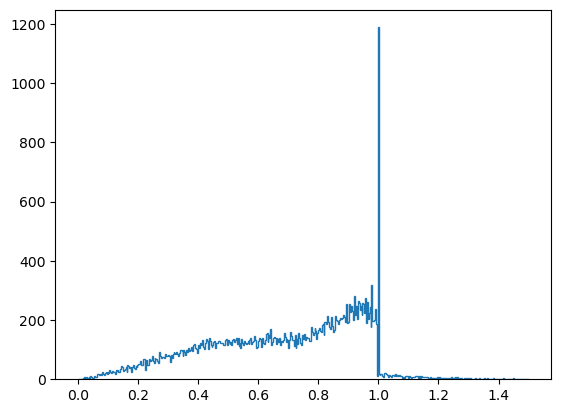

In [133]:
plt.stairs((pile), bins)

/tmp/ipykernel_1019504/3187026794.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.stairs(np.log10(pile), bins)


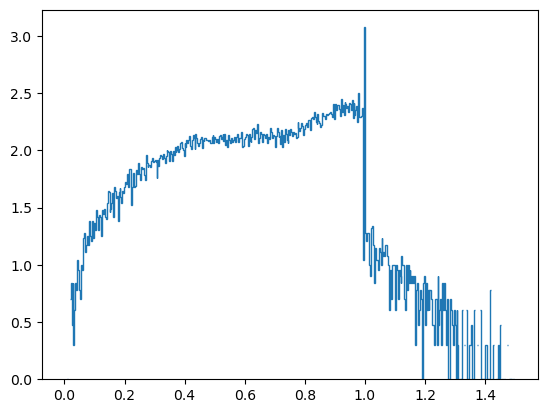

In [134]:
plt.stairs(np.log10(pile), bins)

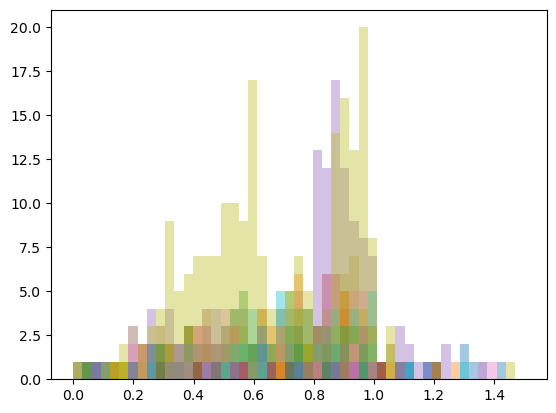

In [107]:
for i in range(0, 1000): 
               plt.hist(df_sats[df_sats['GalpropHaloIndex_Snapshot'] == ids[i]]['GalpropRfric'] / df_cens[df_cens['GalpropHaloIndex_Snapshot'] == ids[i]].reset_index(drop=True)['GalpropRhalo'][0], bins=np.linspace(0, 1.5), alpha=0.4)
        
        

In [93]:
df_cens[df_cens['GalpropHaloIndex_Snapshot'] == ids[0]].reset_index(drop=True)['GalpropRhalo'][0]

0.758326

In [90]:
df_sats[df_sats['GalpropHaloIndex_Snapshot'] == ids[0]]['GalpropRfric'].to_numpy() / df_cens[df_cens['GalpropHaloIndex_Snapshot'] == ids[0]]['GalpropRhalo']

ValueError: Length of values (17) does not match length of index (1)